# Lab 6 - Model comparison

## Import packages

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from cmdstanpy import CmdStanModel

# import warnings
# warnings.filterwarnings("ignore")

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1. Generate data

In [7]:
F, L = len("Artur"), len("Mzyk")
N = (L + F) * 100
print(f"F = {F}, L = {L}, N = {N}")
seed = 29042020

F = 5, L = 4, N = 900


In [4]:
model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/Lab6/code_1.stan to exe file /home/Lab6/code_1
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_1


In [8]:
samples1 = model1.sample(data={'N': N}, fixed_param=True, iter_sampling=1, iter_warmup=0, seed=seed, chains=1)
df1 = samples1.draws_pd()
df1.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[891],y[892],y[893],y[894],y[895],y[896],y[897],y[898],y[899],y[900]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,0.328404,0.358179,1.15662,1.8954,0.345047,1.7689,1.8692,-2.2987,-1.30911,0.648789


In [9]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /home/Lab6/code_2.stan to exe file /home/Lab6/code_2
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_2


In [10]:
samples2 = model2.sample(data={'N': N}, fixed_param=True, iter_sampling=1, iter_warmup=0, seed=seed, chains=1)
df2 = samples2.draws_pd()
df2.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[891],y[892],y[893],y[894],y[895],y[896],y[897],y[898],y[899],y[900]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,2.27466,0.254937,2.71356,-2.0202,-2.47591,-2.98993,1.30557,4.76874,1.47935,1.62862


## Excercise 2. Compare normal and student models for data from first file

In [12]:
data_sim1 = {'N': N, 'y': df1.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N))}

In [11]:
model3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:compiling stan file /home/Lab6/code_3.stan to exe file /home/Lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_3


In [13]:
samples3 = model3.sample(data=data_sim1)
df3 = samples3.draws_pd()
df3.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)








chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)









chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[891],y_hat[892],y_hat[893],y_hat[894],y_hat[895],y_hat[896],y_hat[897],y_hat[898],y_hat[899],y_hat[900]
0,-1616.77,0.872557,0.839151,2.0,3.0,0.0,1617.28,1.41582,0.000191,-1.31164,...,-1.693740,0.00735,-0.603268,-0.384257,-1.369210,-0.191218,-0.022887,-2.071950,-0.699204,3.013740
1,-1616.65,0.992878,0.839151,2.0,7.0,0.0,1617.52,1.39606,0.035224,-1.30681,...,0.225013,1.33635,0.752568,2.045080,-2.819420,0.953777,0.297656,-1.076000,1.387830,-0.724820
2,-1614.89,0.802789,0.839151,1.0,3.0,0.0,1618.73,1.45747,0.116905,-1.36464,...,0.031758,1.08067,0.618173,-0.819355,-2.571290,-1.120260,1.617170,-0.473935,0.071846,0.451610
3,-1614.82,0.992547,0.839151,2.0,3.0,0.0,1615.01,1.44366,0.055406,-1.34137,...,0.997638,0.10215,-1.904850,1.445770,-2.024140,0.123858,-0.763052,-1.302480,-1.199120,-0.547981
4,-1614.64,0.983042,0.839151,1.0,3.0,0.0,1614.99,1.45116,0.088850,-1.35387,...,1.287400,1.79063,0.887840,-0.091169,0.382899,-0.426307,0.607361,-0.303553,-0.237175,1.088680


In [14]:
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /home/Lab6/code_4.stan to exe file /home/Lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_4


In [15]:
samples4 = model4.sample(data=data_sim1)
df4 = samples4.draws_pd()
df4.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 200


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[891],y_hat[892],y_hat[893],y_hat[894],y_hat[895],y_hat[896],y_hat[897],y_hat[898],y_hat[899],y_hat[900]
0,-1330.45,0.988997,0.62082,3.0,7.0,0.0,1333.03,0.763552,0.048110,3.59495,...,-0.422796,-0.597801,0.449501,-1.501140,4.609180,0.118818,-1.091350,1.272660,1.014300,0.030460
1,-1333.99,0.897021,0.62082,2.0,3.0,0.0,1334.51,0.733693,0.020833,3.00824,...,-0.214568,-0.033067,0.355474,-0.887824,-1.321910,-0.824882,-0.069715,-0.380298,-0.461730,-0.888724
2,-1332.17,0.873422,0.62082,2.0,3.0,0.0,1338.07,0.755774,0.071363,3.49630,...,-0.593452,-0.799584,2.988280,1.022800,1.042550,-0.334650,0.101815,-1.866370,3.025360,0.508977
3,-1330.33,0.955338,0.62082,2.0,3.0,0.0,1333.24,0.800077,0.039418,3.33509,...,0.058336,-0.655935,1.342390,-0.232453,-1.333600,0.366206,-0.684915,0.987473,0.223362,0.755635
4,-1330.37,0.991575,0.62082,3.0,7.0,0.0,1332.04,0.805006,-0.049450,4.68675,...,0.812339,-0.073893,0.967337,0.024008,0.542795,0.182572,-0.420629,-0.551313,-1.893720,-0.462266


In [16]:
compare_model_loo = az.compare({"Normal model": az.from_cmdstanpy(samples3), "Student model": az.from_cmdstanpy(samples4)}, ic="loo", scale="deviance")
compare_model_loo.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student model,0,2659.027947,4.717360,0.000000,1.000000e+00,66.006924,0.000000,False,deviance
Normal model,1,3262.192726,29.278072,603.164779,3.446985e-10,255.979380,211.062491,True,deviance


In [17]:
compare_model_waic = az.compare({"Normal model": az.from_cmdstanpy(samples3), "Student model": az.from_cmdstanpy(samples4)}, ic="waic", scale="deviance")
compare_model_waic.head()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student model,0,2658.978841,4.692807,0.000000,1.000000e+00,65.989483,0.000000,True,deviance
Normal model,1,3267.665646,32.014531,608.686805,6.819789e-11,259.060322,214.205012,True,deviance


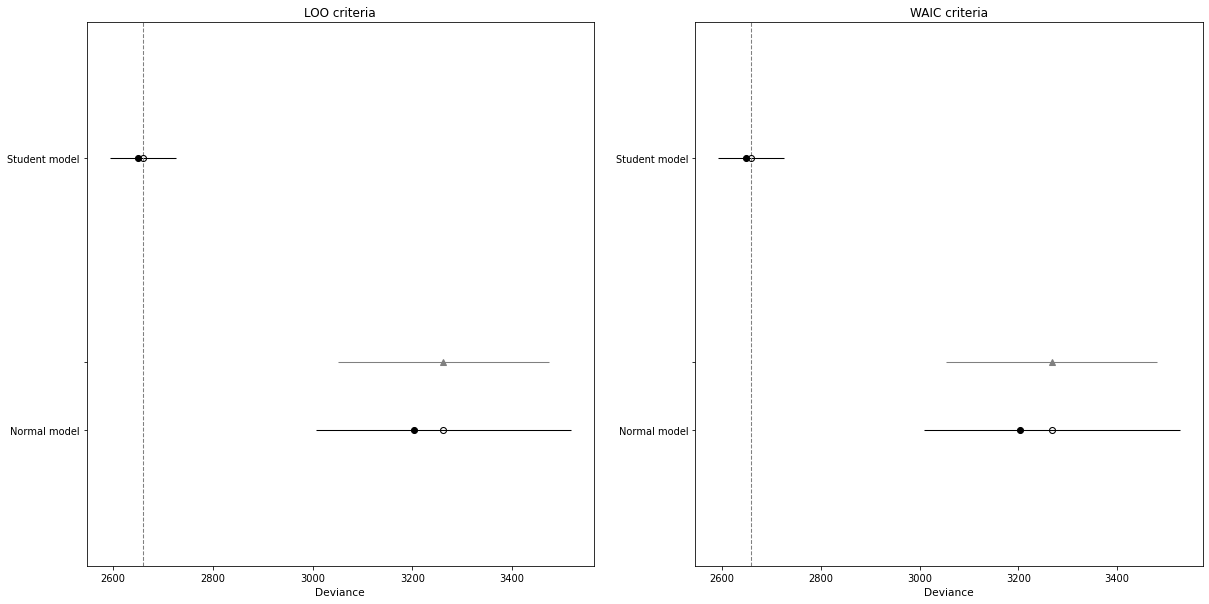

In [20]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
az.plot_compare(compare_model_loo, insample_dev=True, ax=ax[0])
ax[0].set_title("LOO criteria")
az.plot_compare(compare_model_waic, insample_dev=True, ax=ax[1])
ax[1].set_title("WAIC criteria")
plt.show()

**Model based on the Student's t-distribution is quite simpler and has lower LOO and WAIC criteria values.**

## Excercise 3. Compare models with different numbers of predictors

In [21]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/Lab6/code_5.stan to exe file /home/Lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_5


In [23]:
data_sim2_1 = {'N': N, 'K': 1, 'y': df2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N, 1))}
samples5_1 = model5.sample(data=data_sim2_1)

data_sim2_2 = {'N': N, 'K': 2, 'y': df2.loc[:, 'y[1]' : f'y[{N}]'].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]' : f'X[{N},2]'].values.reshape((N, 2))}
samples5_2 = model5.sample(data=data_sim2_2)

data_sim2_3 = {'N': N, 'K': 3, 'y': df2.loc[:, 'y[1]' : f'y[{N}]'].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]' : f'X[{N},3]'].values.reshape((N, 3))}
samples5_3 = model5.sample(data=data_sim2_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)






chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)



chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██████████| 00:07 Sampling co


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)








chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:07 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:08 Iteration: 1900 / 2000 [ 95%]  (Sampling)




chain 1 |██████████| 00:08 Sampling completed                       
chain 2 |██████████| 00:08 Sam


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed   

INFO:cmdstanpy:CmdStan done processing.


In [24]:
compare_model_loo = az.compare({"1 predictor": az.from_cmdstanpy(samples5_1), "2 predictors": az.from_cmdstanpy(samples5_2), "3 predictors": az.from_cmdstanpy(samples5_3)},
ic="loo", scale="deviance")
compare_model_loo.head()

compare_model_waic = az.compare({"1 predictor": az.from_cmdstanpy(samples5_1), "2 predictors": az.from_cmdstanpy(samples5_2), "3 predictors": az.from_cmdstanpy(samples5_3)},
ic="waic", scale="deviance")
compare_model_waic.head()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1 predictor,0,3293.535883,2.038365,0.000000,1.0,41.263590,0.000000,False,deviance
2 predictors,1,4202.022663,3.071310,908.486779,0.0,41.834787,48.119245,False,deviance
3 predictors,2,4202.278697,4.086373,908.742814,0.0,42.097598,48.444226,False,deviance


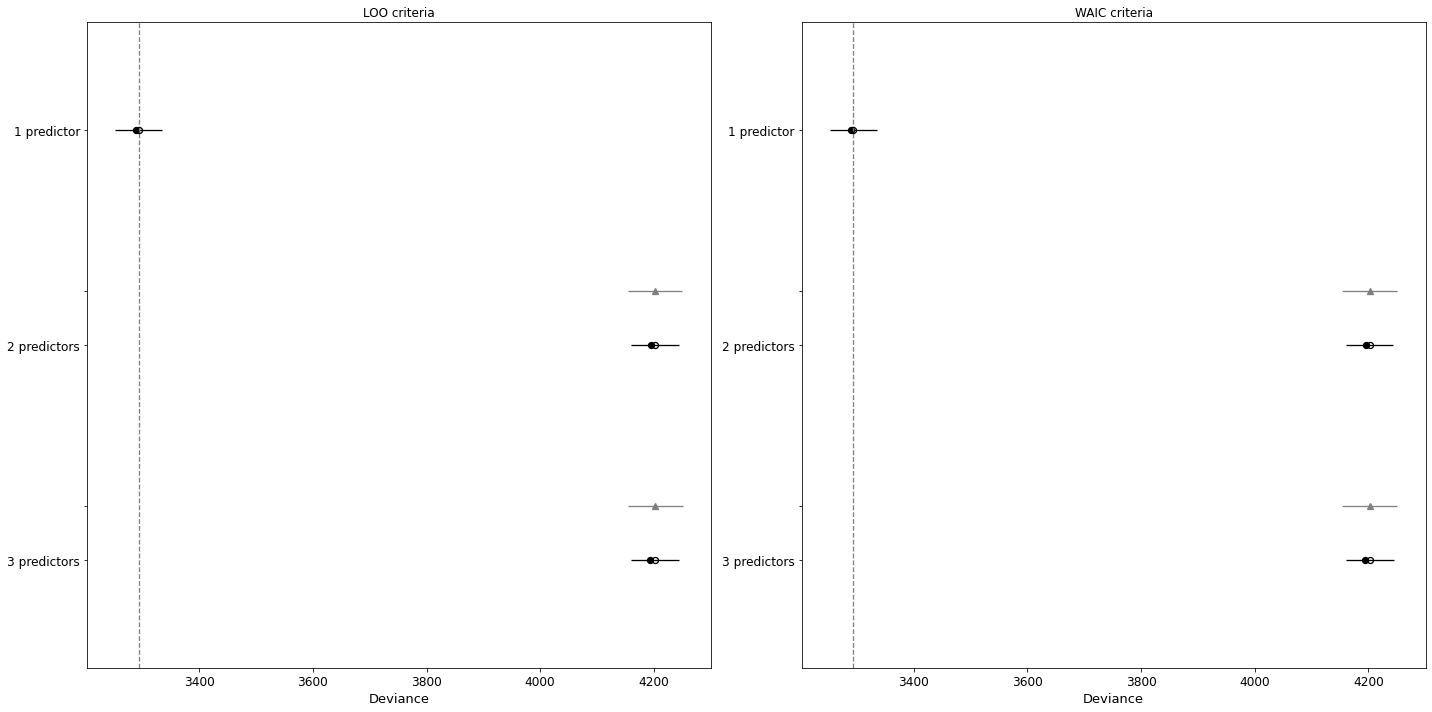

In [26]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
az.plot_compare(compare_model_loo, insample_dev=True, ax=ax[0])
ax[0].set_title("LOO criteria")
az.plot_compare(compare_model_waic, insample_dev=True, ax=ax[1])
ax[1].set_title("WAIC criteria")
plt.tight_layout()
plt.show()

**The best among the analyzed models is the model with a single predictor since its LOO and WAIC criteria values are the lowest.**